# EDA Analysis on the GTZAN dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa as librosa
import librosa.display as lplt
import subprocess
import csv

In [3]:
absolute_path = "f:\\AI Projects\\Music Classification"
relative_path = "Data\\GTZAN\\genres"
full_path = os.path.join(absolute_path, relative_path)
print(full_path)

f:\AI Projects\Music Classification\Data\GTZAN\genres


In [4]:
generes_list = ["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]

Convert all .wav files into .wav formats for easy reading


In [5]:
genre_dirs = []

for i in generes_list:
	genre_dirs.append(os.path.join(full_path,i))

for genre_dir in genre_dirs:
	# change directory to genre_dir
	os.chdir(genre_dir)

	# loop through each file in current dir
	for file in os.listdir(genre_dir):
		if str(file[-3:]) != "wav":
		# SOX
			subprocess.run("sox " + str(file) + " " + str(file[:-3]) + ".wav",shell=True)
		else:
			print(f"Skipping {file}")

	# delete .wav from current dir
	os.system("del *.au")
	print('\n')

print("Conversion complete. Check respective directories.")

Skipping blues.00000.wav
Skipping blues.00001.wav
Skipping blues.00002.wav
Skipping blues.00003.wav
Skipping blues.00004.wav
Skipping blues.00005.wav
Skipping blues.00006.wav
Skipping blues.00007.wav
Skipping blues.00008.wav
Skipping blues.00009.wav
Skipping blues.00010.wav
Skipping blues.00011.wav
Skipping blues.00012.wav
Skipping blues.00013.wav
Skipping blues.00014.wav
Skipping blues.00015.wav
Skipping blues.00016.wav
Skipping blues.00017.wav
Skipping blues.00018.wav
Skipping blues.00019.wav
Skipping blues.00020.wav
Skipping blues.00021.wav
Skipping blues.00022.wav
Skipping blues.00023.wav
Skipping blues.00024.wav
Skipping blues.00025.wav
Skipping blues.00026.wav
Skipping blues.00027.wav
Skipping blues.00028.wav
Skipping blues.00029.wav
Skipping blues.00030.wav
Skipping blues.00031.wav
Skipping blues.00032.wav
Skipping blues.00033.wav
Skipping blues.00034.wav
Skipping blues.00035.wav
Skipping blues.00036.wav
Skipping blues.00037.wav
Skipping blues.00038.wav
Skipping blues.00039.wav


Source: https://medium.com/@sdoshi579/classification-of-music-into-different-genres-using-keras-82ab5339efe0

In [26]:
def cut_song(song):
  start = 0
  end = len(song)
  
  song_pieces = []

  while start + 100000 < end:
    song_pieces.append(song[start:start+100000])

    start += 100000

  return song_pieces

def generate_metadata(file_name = "metadata.csv",force_reload = False,split_songs = False):
    file = None
    GTZAN_path = os.path.join(absolute_path,"Data\\GTZAN\genres")
    file_path = os.path.join(GTZAN_path,file_name)
    
    header = 'filename length chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate tempo'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()

    if not os.path.exists(file_path) or force_reload:
        if not os.path.exists(file_path):
            file = open(file_path, 'x', newline='')
        elif force_reload:
            file = open(file_path, 'w', newline='')
            
        with file:
            writer = csv.writer(file)
            writer.writerow(header)
        
        for g in generes_list:
            for filename in os.listdir(f'{GTZAN_path}\\{g}'):
                songname = f'{GTZAN_path}\\{g}\\{filename}'
                if not split_songs: 
                    y, sr = librosa.load(songname, mono=True, duration=30)
                    length = librosa.get_duration(y=y,sr=sr)
                    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
                    rmse = librosa.feature.rms(y=y)
                    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
                    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
                    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
                    zcr = librosa.feature.zero_crossing_rate(y)
                    tempo = len(y)#librosa.beat.tempo(y=y,sr=sr)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr)
                    to_append = f'{filename} {np.mean(length)} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(tempo)}'  
                    for e in mfcc:
                        to_append += f' {np.mean(e)}'
                    to_append += f' {g}'
                    file = open(file_path, 'a', newline='')
                    with file:
                        writer = csv.writer(file)
                        writer.writerow(to_append.split())
                else:
                    y, sr = librosa.load(songname, mono=True, duration=30)
                    y = cut_song(y)
                    for x,s in enumerate(y):
                        length = librosa.get_duration(y=s,sr=sr)
                        chroma_stft = librosa.feature.chroma_stft(y=s, sr=sr)
                        rmse = librosa.feature.rms(y=s)
                        spec_cent = librosa.feature.spectral_centroid(y=s, sr=sr)
                        spec_bw = librosa.feature.spectral_bandwidth(y=s, sr=sr)
                        rolloff = librosa.feature.spectral_rolloff(y=s, sr=sr)
                        zcr = librosa.feature.zero_crossing_rate(s)
                        tempo = len(s)#librosa.beat.tempo(y=y,sr=sr)
                        mfcc = librosa.feature.mfcc(y=s, sr=sr)
                        to_append = f'{filename}-{x} {np.mean(length)} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(tempo)}'  
                        for e in mfcc:
                            to_append += f' {np.mean(e)}'
                        to_append += f' {g}'
                        file = open(file_path, 'a', newline='')
                        with file:
                            writer = csv.writer(file)
                            writer.writerow(to_append.split())
    else:
        print("Skipping metadata generation")

In [27]:
generate_metadata(force_reload=True,split_songs=True)


In [18]:
GTZAN_path = os.path.join(absolute_path,"Data\\GTZAN\genres")
file_path = os.path.join(GTZAN_path,"metadata.csv")
metadata = pd.read_csv(file_path)
metadata.head()

filename  chroma_stft      rmse  spectral_centroid  \
0  blues.00000.wav     0.349951  0.130192        1784.416546   
1  blues.00001.wav     0.340945  0.095892        1529.871314   
2  blues.00002.wav     0.363562  0.175494        1552.637786   
3  blues.00003.wav     0.404848  0.141139        1070.110059   
4  blues.00004.wav     0.308598  0.091540        1835.507009   

   spectral_bandwidth      rolloff  zero_crossing_rate       tempo  \
0         2002.657106  3806.418650            0.083066  123.046875   
1         2038.612143  3548.986873            0.056044  107.666016   
2         1747.382028  3041.089944            0.076301  161.499023   
3         1596.244204  2185.061787            0.033309  172.265625   
4         1748.367477  3581.003346            0.101500  135.999178   

        mfcc1       mfcc2  ...    mfcc12    mfcc13    mfcc14    mfcc15  \
0 -113.619385  121.553017  ...  8.806787 -3.665802  5.745939 -5.161711   
1 -207.581512  123.997147  ...  5.375942 -2.237833  4.217125 -6.011047   
2  -90.776344  140.448608  ...  5.785763 -8.899733 -1.087024 -9.216774   
3 -199.462006  150.094727  ...  6.085354 -2.476188 -1.076225 -2.876056   
4 -160.291855  126.195763  ... -2.809849 -6.935621 -7.559294 -9.172152   

     mfcc16    mfcc17    mfcc18    mfcc19     mfcc20  label  
0  0.750298 -1.688358 -0.409329 -2.298869   1.219947  blues  
1  0.932668 -0.717028  0.292333 -0.285717   0.532144  blues  
2  2.453648 -7.721793 -1.816497 -3.434354  -2.231391  blues  
3  0.776909 -3.320055  0.637263 -0.617507  -3.406940  blues  
4 -4.510408 -5.453736 -0.924468 -4.408076 -11.701833  blues  

[5 rows x 29 columns]

#### Waveform for each audio sample in each of the 10 genres

In [ ]:
from IPython.display import Audio
Audio(f'{full_path}\\blues\\blues.00000.wav')

In [ ]:
Audio(f'{full_path}\\metal\\metal.00000.wav')

In [20]:
tracks = ["blues\\blues.00000.wav",
"classical\\classical.00000.wav",
"country\\country.00000.wav",
"disco\\disco.00000.wav",
"hiphop\\hiphop.00000.wav",
"jazz\\jazz.00000.wav",
"metal\\metal.00000.wav",
"pop\\pop.00000.wav",
"reggae\\reggae.00000.wav",
"rock\\rock.00000.wav"]

Spectrogram on frequency

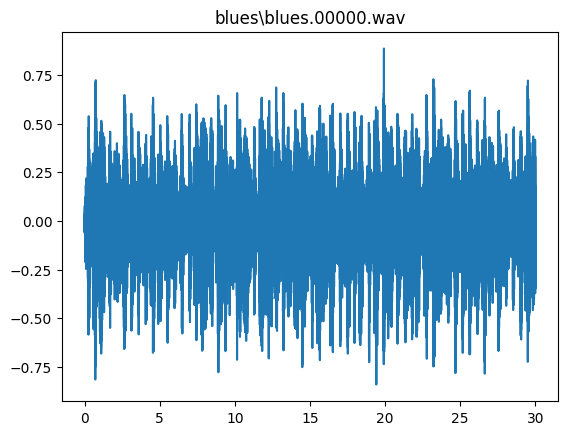

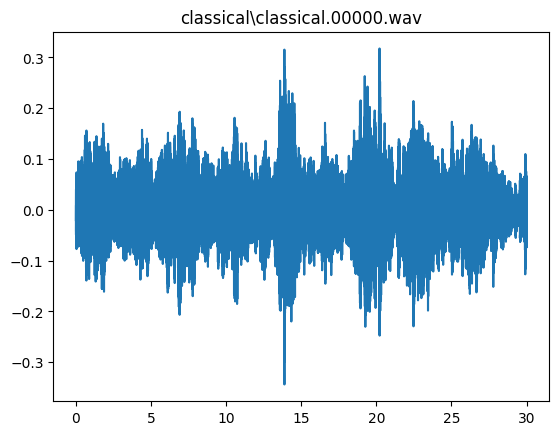

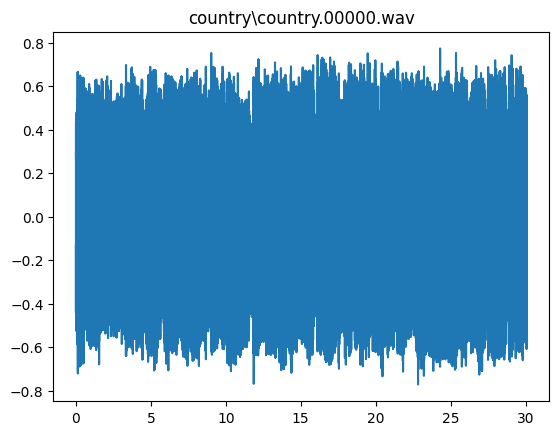

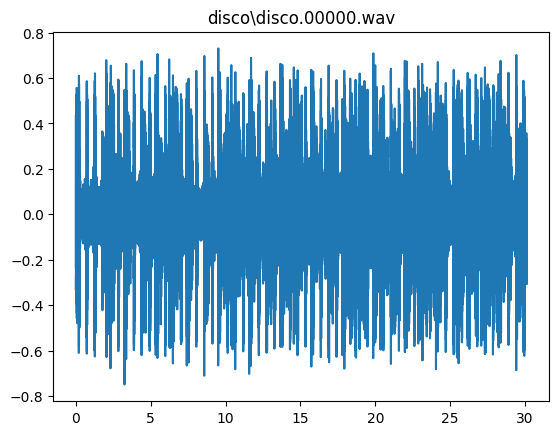

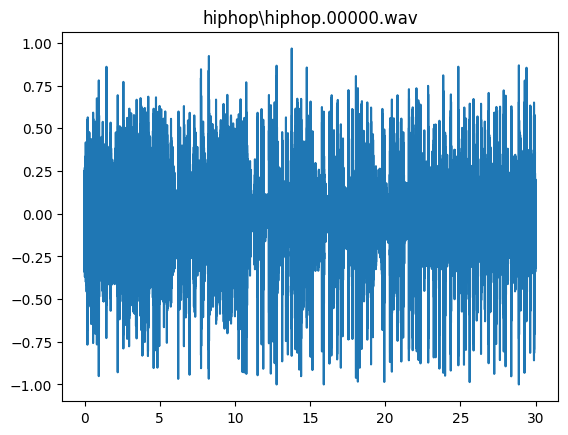

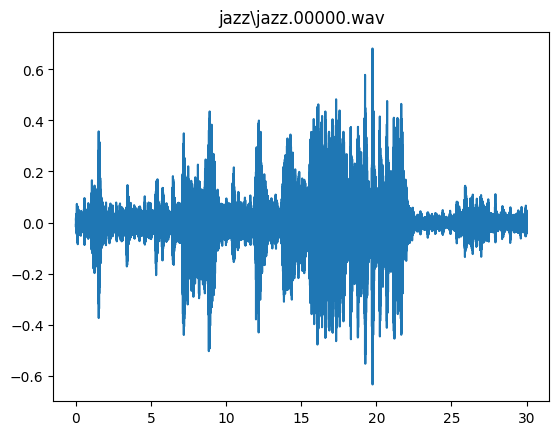

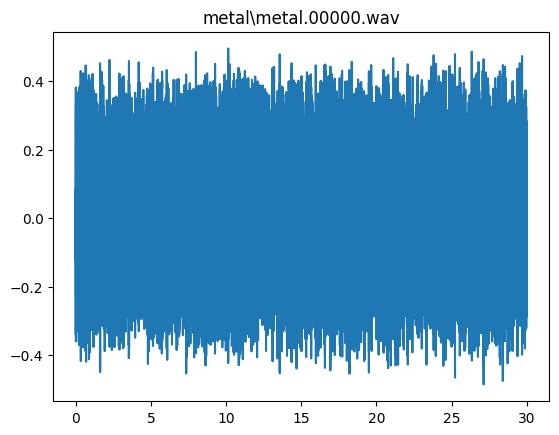

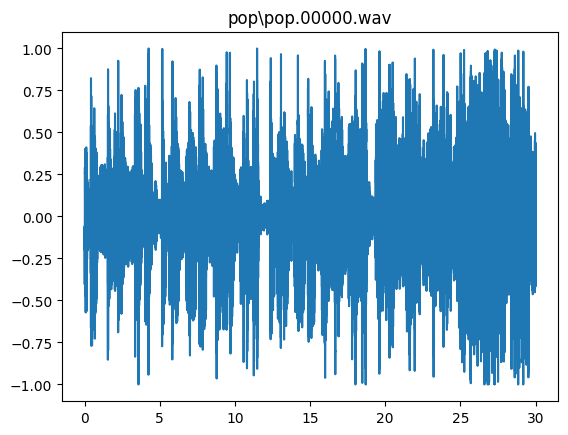

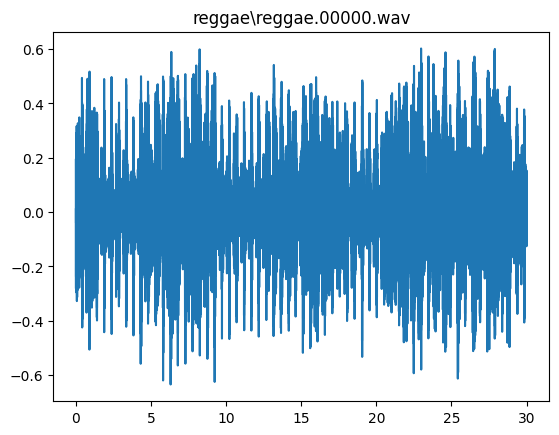

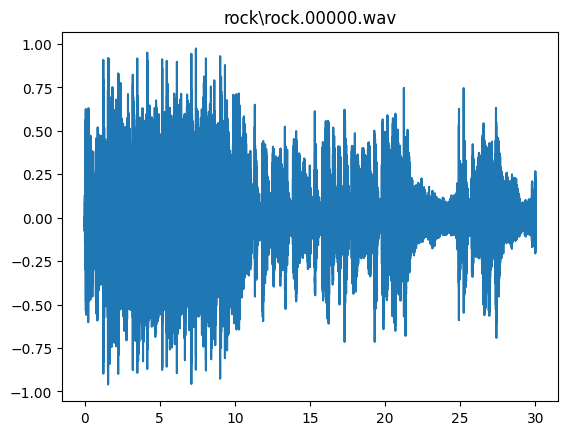

In [21]:
for i in range(0,len(tracks)):
    audio,sfreq = librosa.load(os.path.join(full_path,tracks[i]))
    fig,ax = plt.subplots()
    time = np.arange(0,len(audio))/sfreq
    ax.plot(time,audio)
    ax.set_title(tracks[i])
    plt.show()

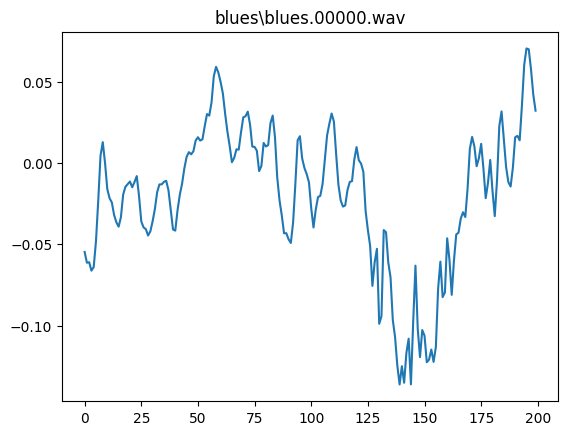

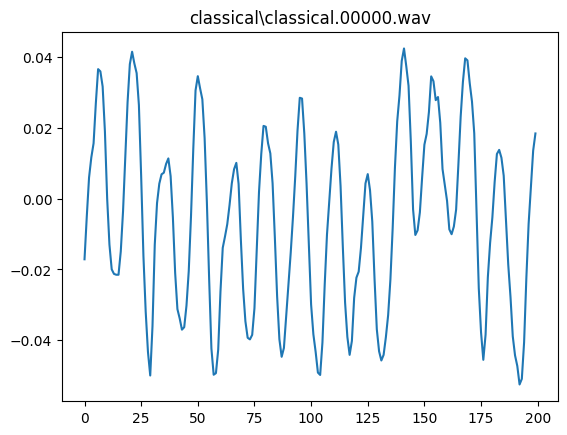

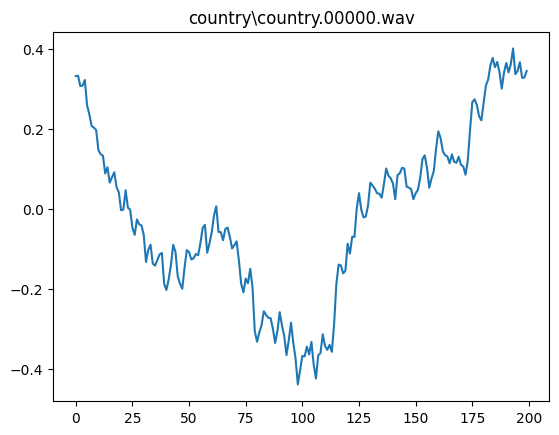

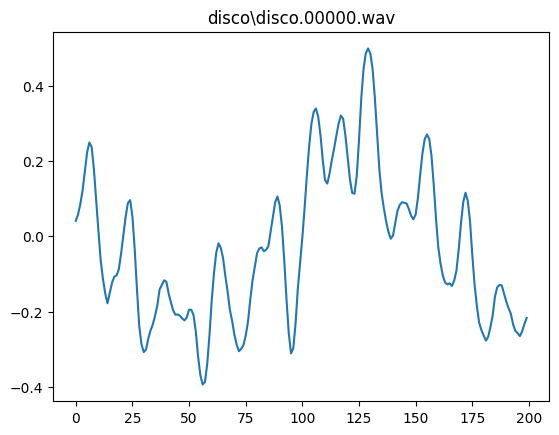

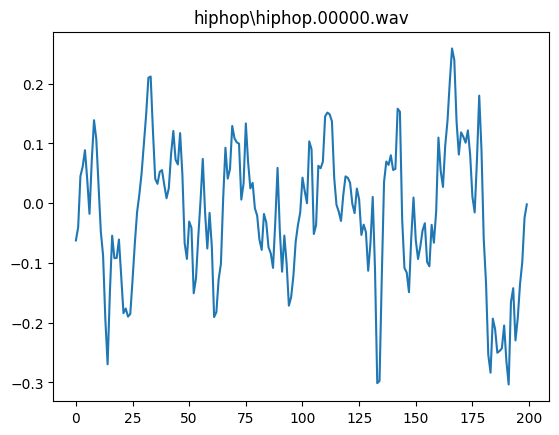

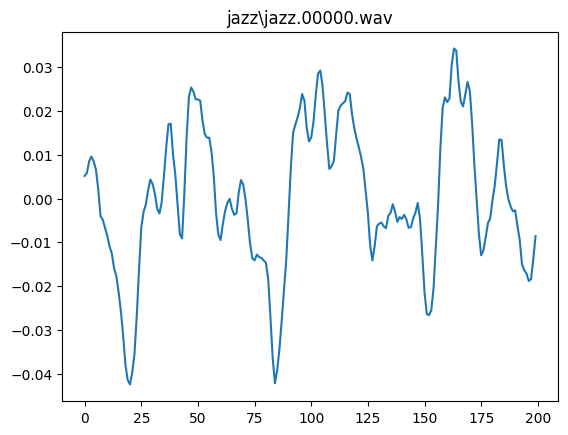

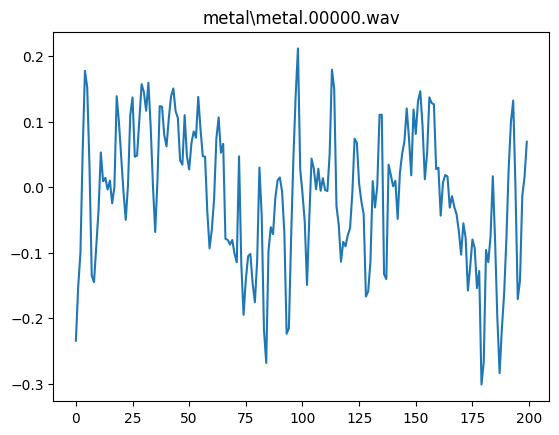

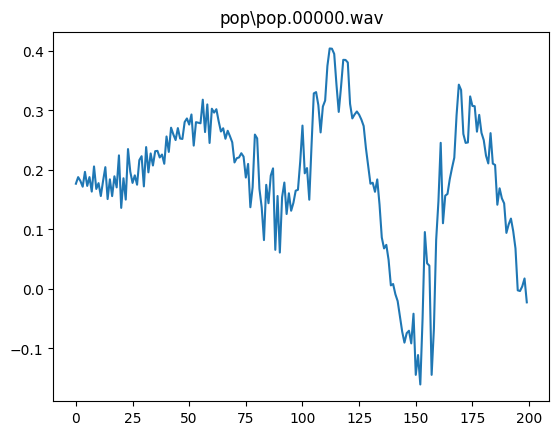

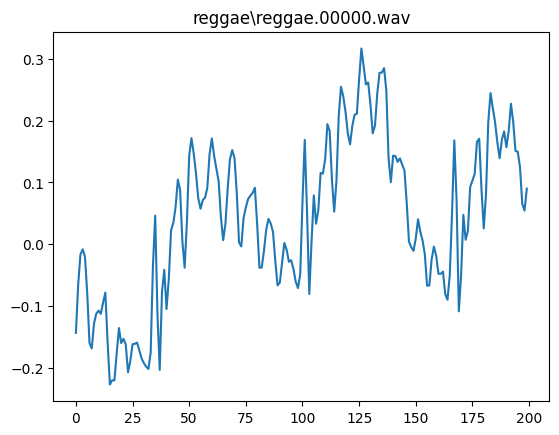

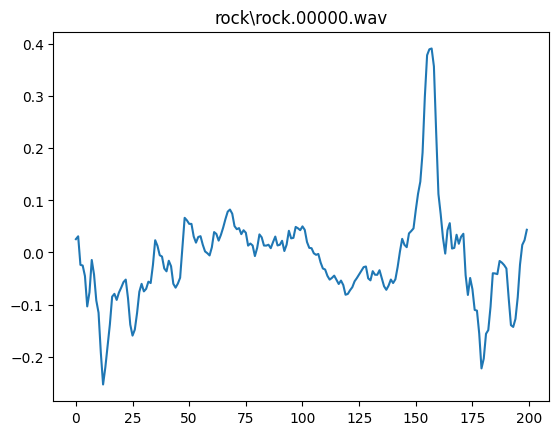

In [22]:
for i in range(0,len(tracks)):
    audio,sfreq = librosa.load(os.path.join(full_path,tracks[i]))
    fig,ax = plt.subplots()
    ax.plot(audio[1000:1200])
    ax.set_title(tracks[i])
    plt.show()

#### Spectrogram for each of the audio samples in each of the 10 genres

d:\anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


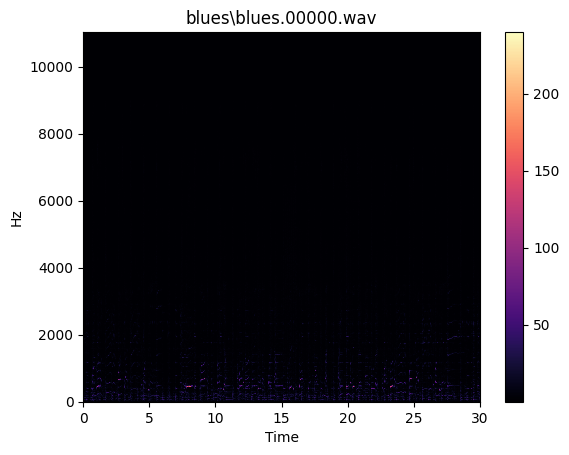

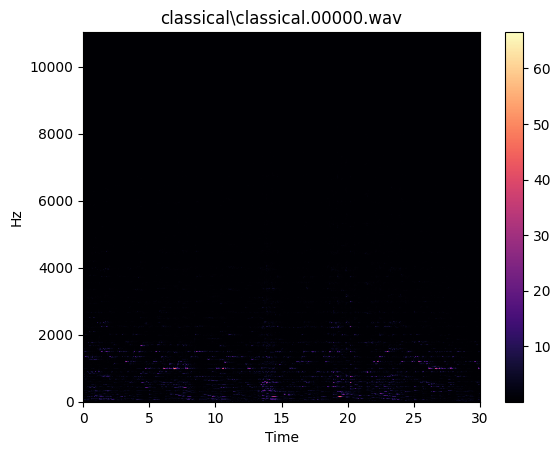

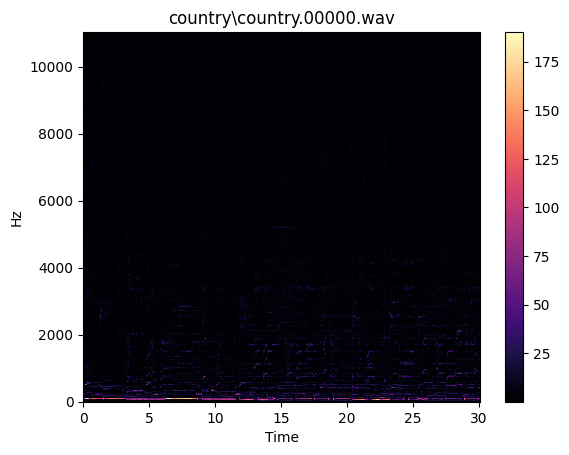

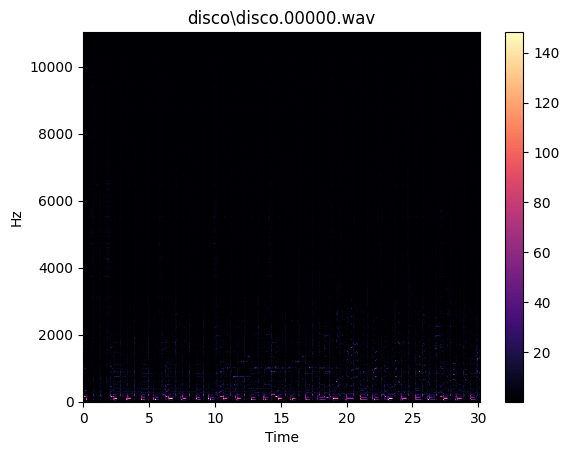

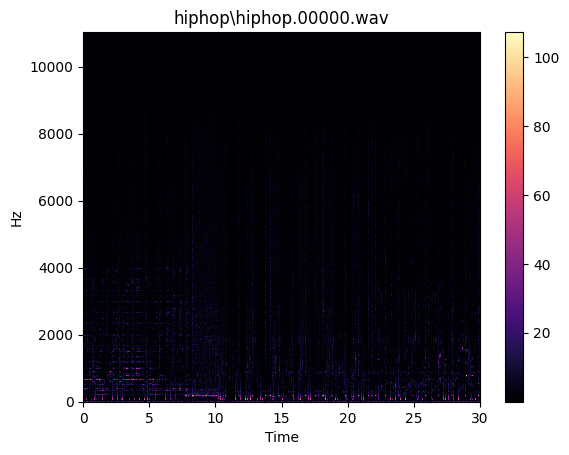

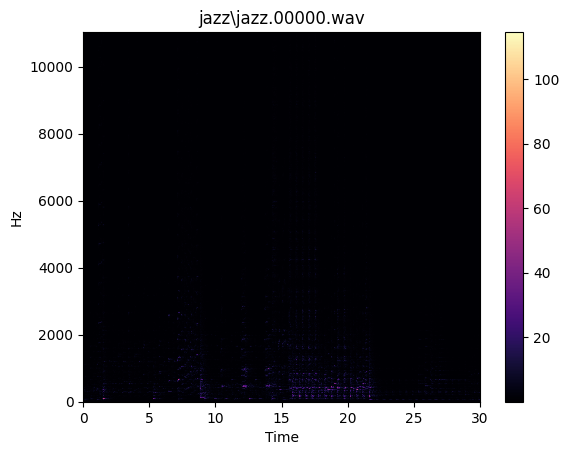

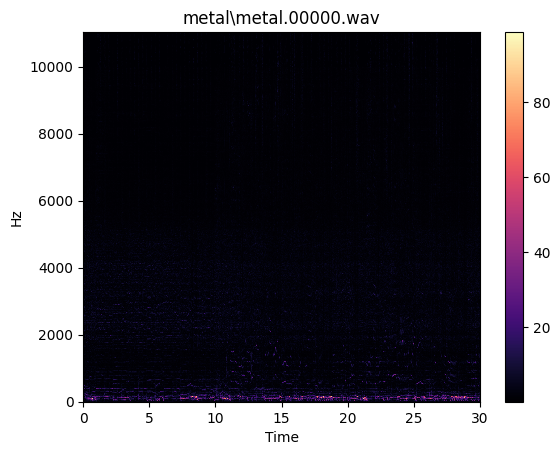

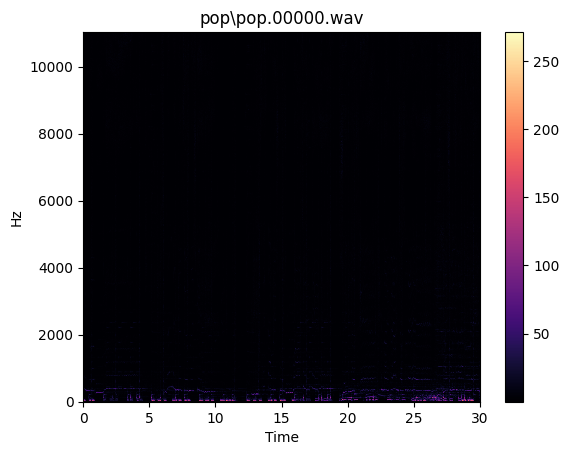

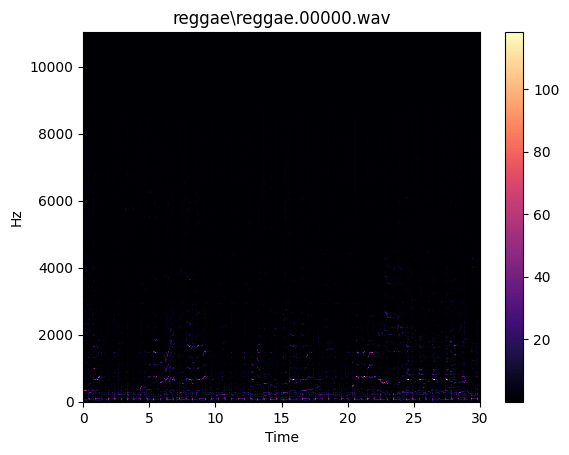

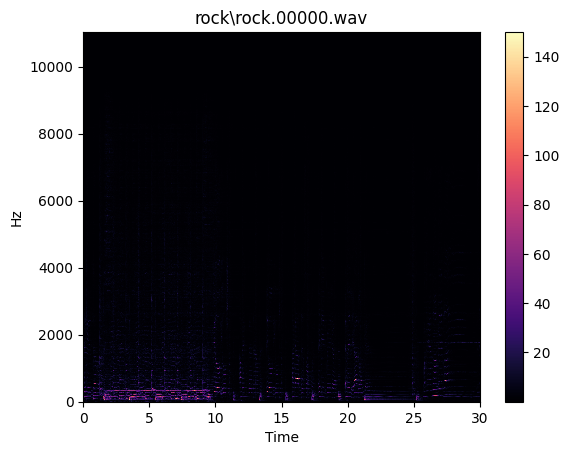

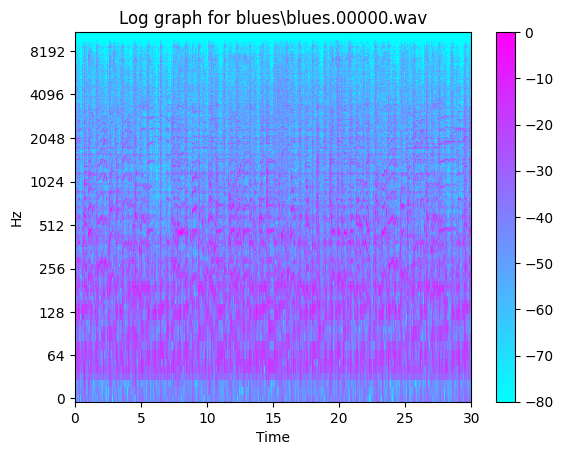

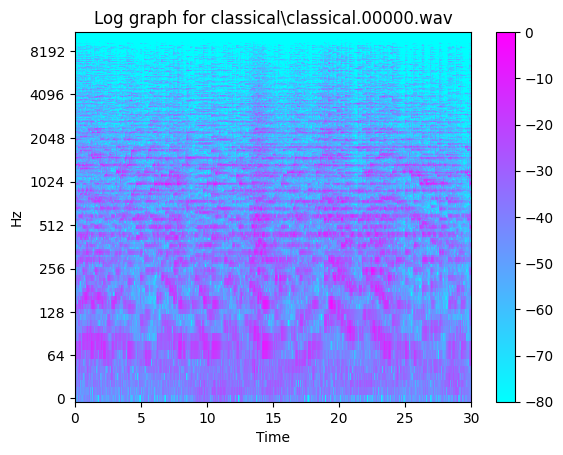

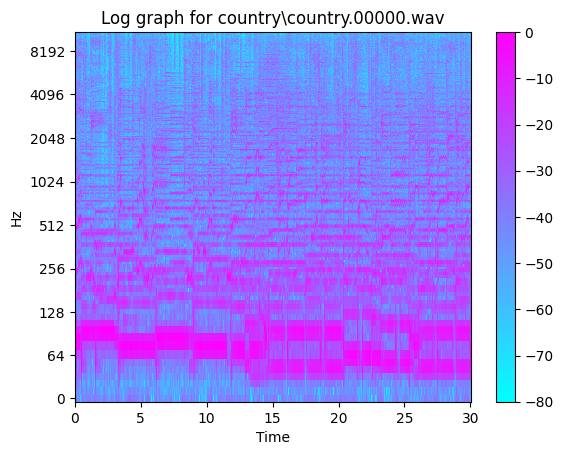

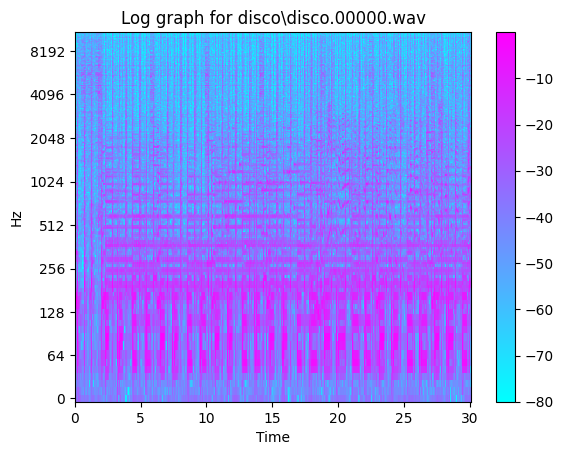

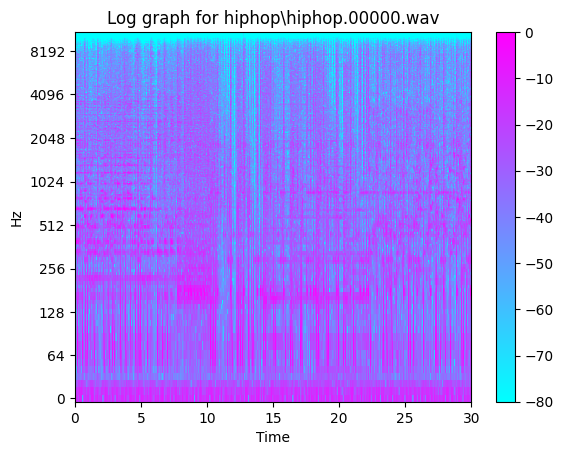

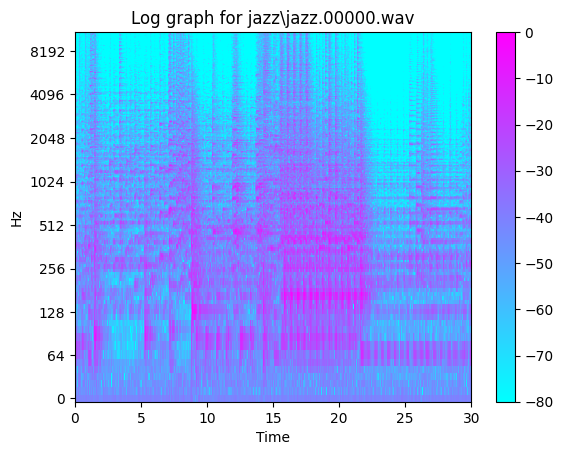

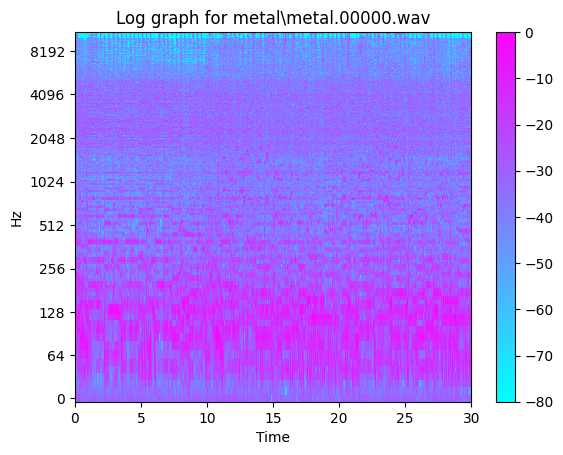

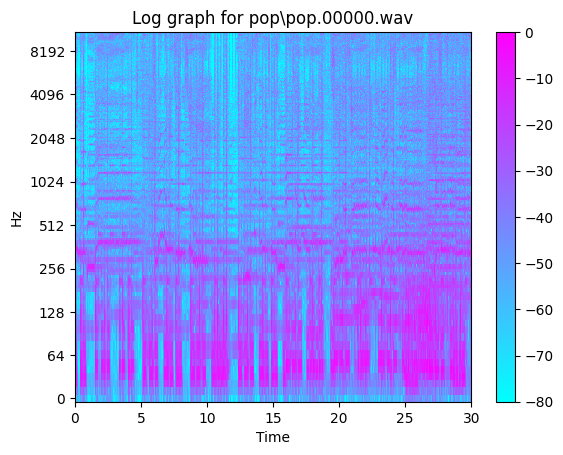

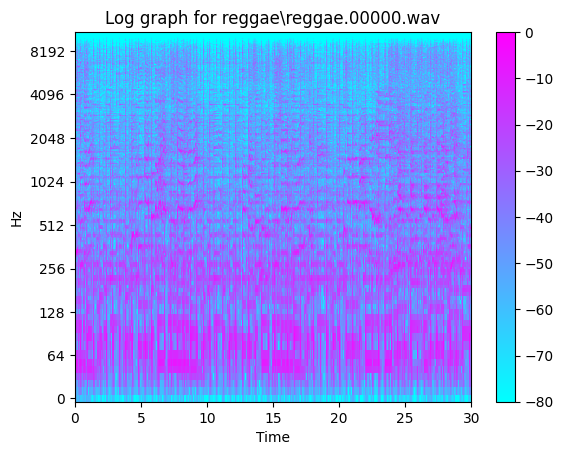

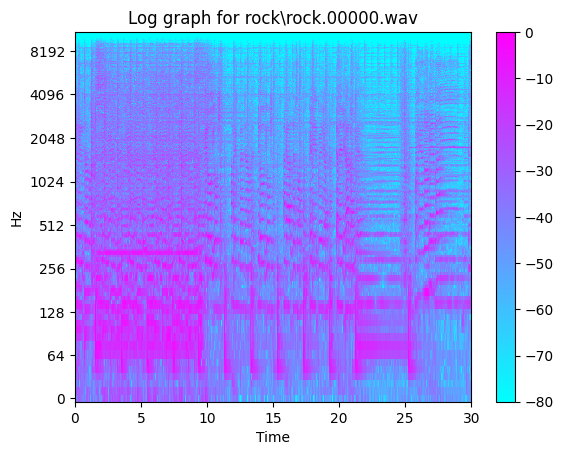

In [23]:
win_size = 2048
hop_length = 512

for i in range(0,len(tracks)):
    audio,sfreq = librosa.load(os.path.join(full_path,tracks[i]))
    fig,ax = plt.subplots()
    stft = librosa.stft(audio,n_fft=win_size,hop_length=hop_length)  # STFT of y
    stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    # img = librosa.display.specshow(S_db, x_axis='time',y_axis='log',ax=ax)
    # ax.set(title=tracks[i])
    # fig.colorbar(img,ax=ax,format="%+2.f dB")
    lplt.specshow(stft,sr=sfreq,x_axis='time',y_axis='hz')
    ax.set(title=tracks[i])
    plt.colorbar()
    plt.show()

for i in range(0,len(tracks)):
    audio,sfreq = librosa.load(os.path.join(full_path,tracks[i]))
    fig,ax = plt.subplots()
    stft = librosa.stft(audio,n_fft=win_size,hop_length=hop_length)  # STFT of y
    stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    # img = librosa.display.specshow(S_db, x_axis='time',y_axis='log',ax=ax)
    # ax.set(title=tracks[i])
    # fig.colorbar(img,ax=ax,format="%+2.f dB")
    lplt.specshow(stft_db,sr=sfreq,x_axis='time',y_axis='log',cmap='cool')
    ax.set(title=f'Log graph for {tracks[i]}')
    plt.colorbar()
    plt.show()


Text(0, 0.5, 'BPM')

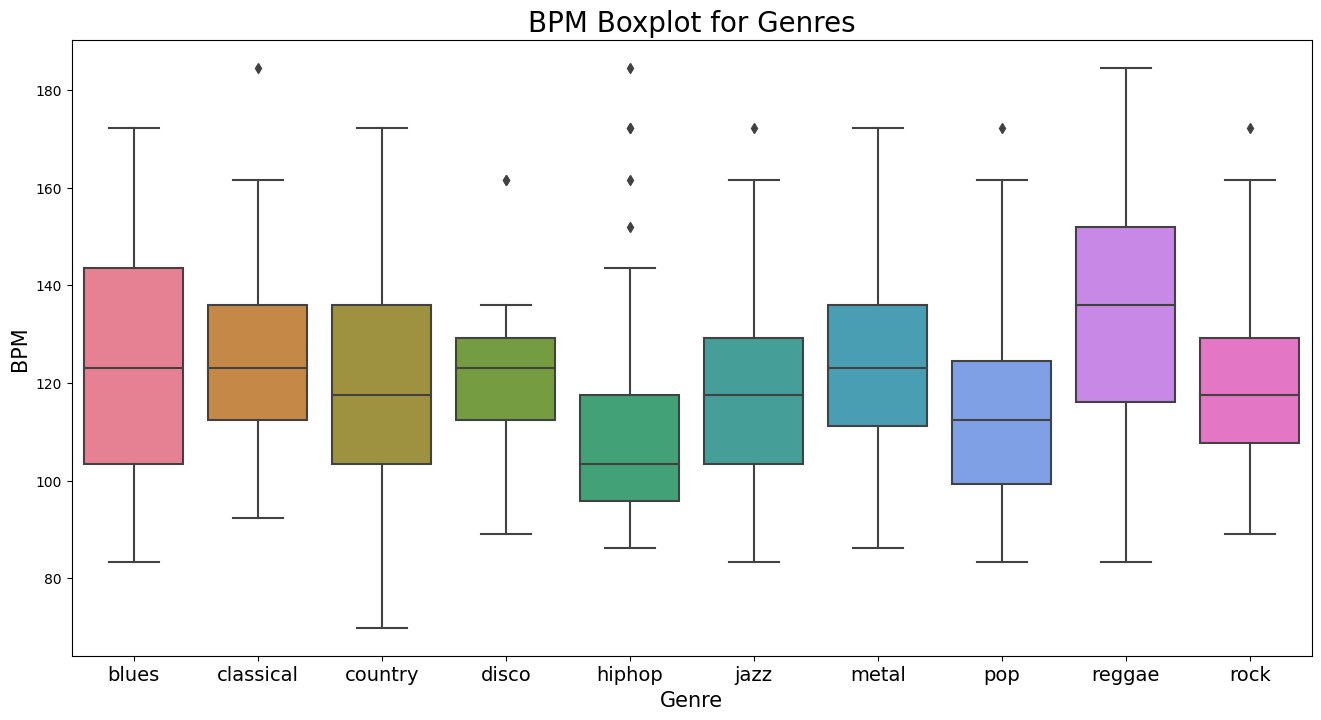

In [24]:
import seaborn as sns

x = metadata[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)